In [1]:
# all the good stuff
import os,sys
import glob
import pandas as pd
import math
from osgeo import gdal
import numpy as np
from array import array
from scipy  import signal
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde
#matplotlib  widget

#### Read in coherence stats files

In [3]:
# read in coherence stats if not saved in output
f1 = gdal.Open(workdir+'cor_avg.r4', gdal.GA_ReadOnly)
cor_avg = f1.ReadAsArray()
f1 = gdal.Open(workdir+'cor_med.r4', gdal.GA_ReadOnly)
cor_med = f1.ReadAsArray()
f1 = gdal.Open(workdir+'cor_std.r4', gdal.GA_ReadOnly)
cor_std = f1.ReadAsArray()
f1 = None

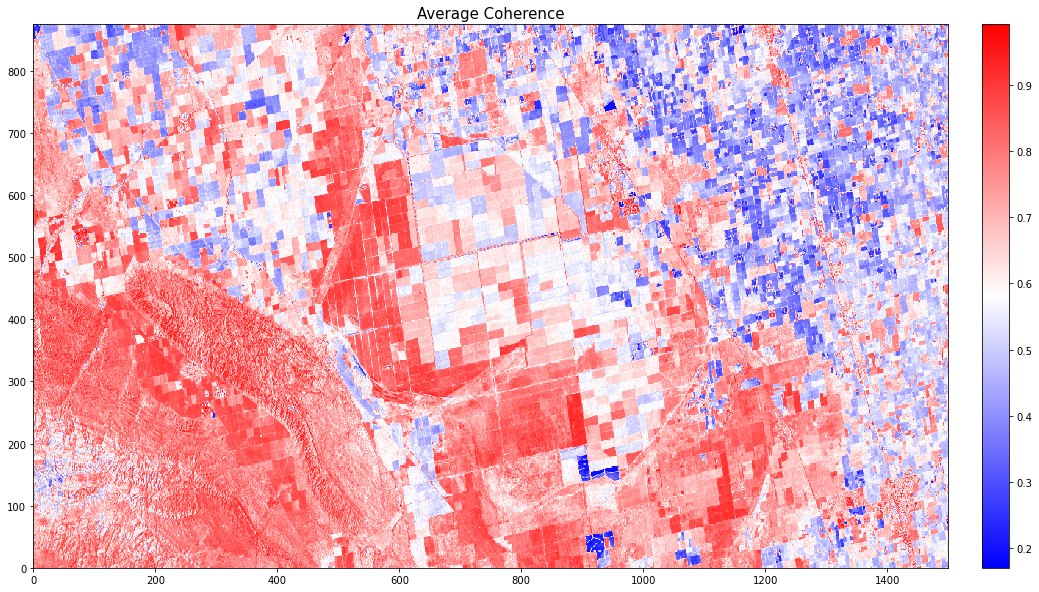

In [27]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
im = plt.pcolor(np.flipud(np.fliplr(cor_avg)))
plt.colorbar(orientation='vertical',pad=0.03)
plt.set_cmap('bwr')
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.title('Average Coherence',fontsize=15)
plt.show()

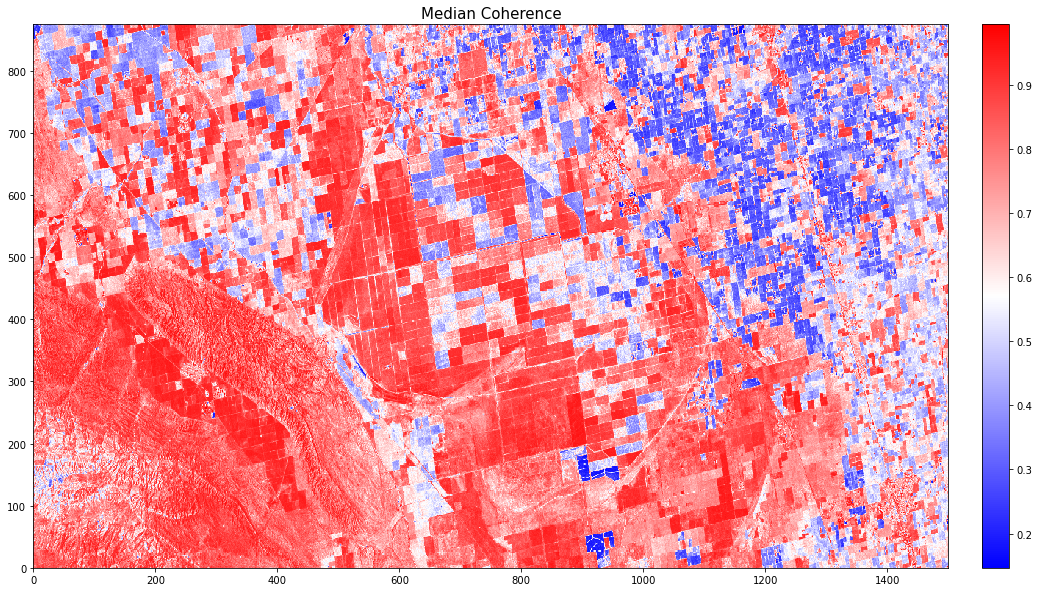

In [28]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
im = plt.pcolor(np.flipud(np.fliplr(cor_med)))
plt.colorbar(orientation='vertical',pad=0.03)
plt.set_cmap('bwr')
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.title('Median Coherence',fontsize=15)
plt.show()

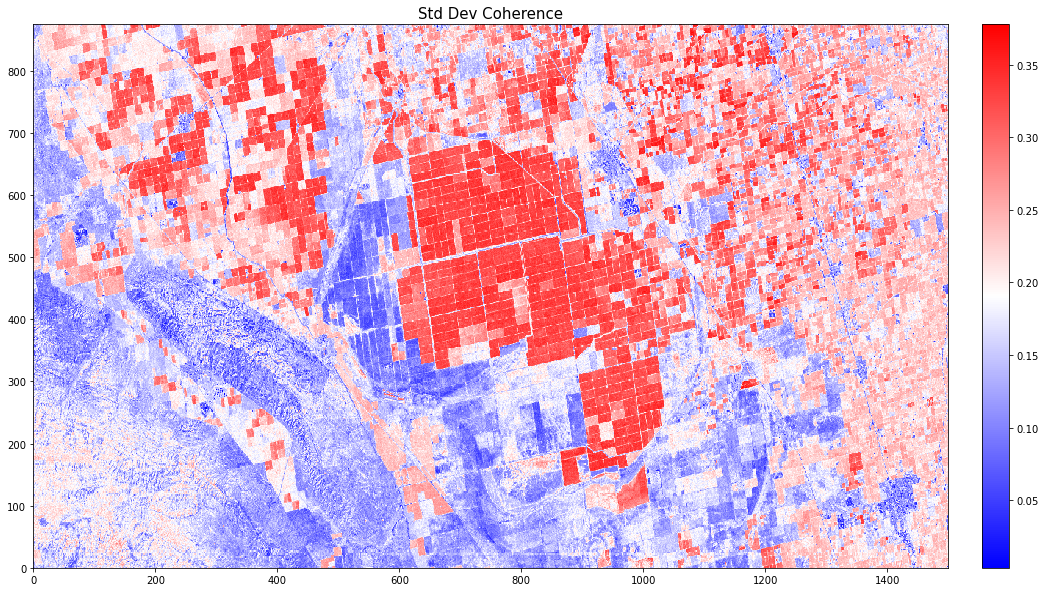

In [29]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
im = plt.pcolor(np.flipud(np.fliplr(cor_std)))
plt.colorbar(orientation='vertical',pad=0.03)
plt.set_cmap('bwr')
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.title('Std Dev Coherence',fontsize=15)
plt.show()

In [4]:
#read in crop data and mask out changes between 2019-2021
f1 = gdal.Open(workdir+'cropscape/radar/CDL_2019_clip_20220408094633_39327711.tif', gdal.GA_ReadOnly)
crops = f1.ReadAsArray()
f1 = gdal.Open(workdir+'cropscape/radar/same_mask.r4', gdal.GA_ReadOnly)
same_mask = f1.ReadAsArray()
f1 = gdal.Open(workdir+'cropscape/radar/diff_mask.r4', gdal.GA_ReadOnly)
diff_mask = f1.ReadAsArray()
f1 = None

In [5]:
flat_cor_med = cor_med.flatten()
flat_cor_std = cor_std.flatten()
nan_flat_cor_med = np.nan_to_num(flat_cor_med)
nan_flat_cor_std = np.nan_to_num(flat_cor_std)
flat_crops = crops.flatten()

flat_same_mask = same_mask.flatten()
flat_diff_mask = diff_mask.flatten()
same_crops = flat_crops*flat_same_mask
same_med = flat_cor_med*flat_same_mask
same_std = flat_cor_std*flat_same_mask

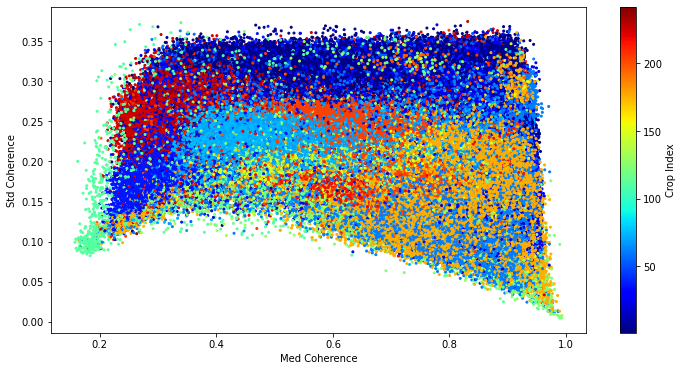

In [22]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes()
im = ax.scatter(flat_cor_med[::5],flat_cor_std[::5],c=flat_crops[::5],s=4)
plt.colorbar(im,ax=ax,orientation='vertical',pad=.05,label='Crop Index')
plt.set_cmap('jet')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

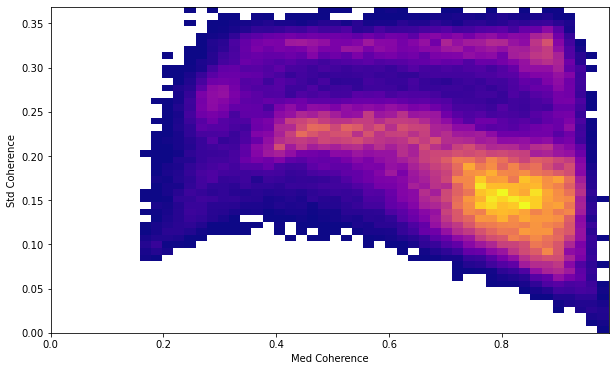

In [30]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = plt.hist2d(nan_flat_cor_med[::10],nan_flat_cor_std[::10],bins=50,cmin=1,cmax=450)
plt.set_cmap('plasma')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

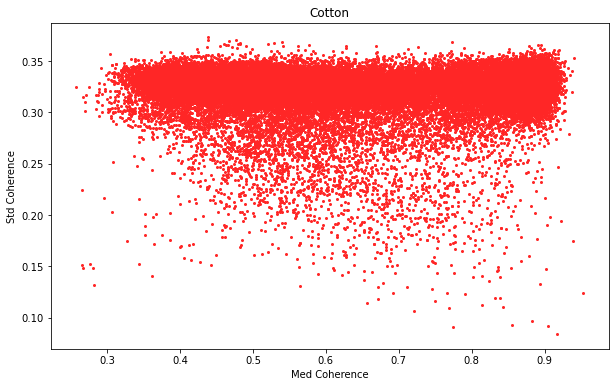

In [42]:
# cotton
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==2],same_std[same_crops==2],s=4,color='#FF2626')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Cotton',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

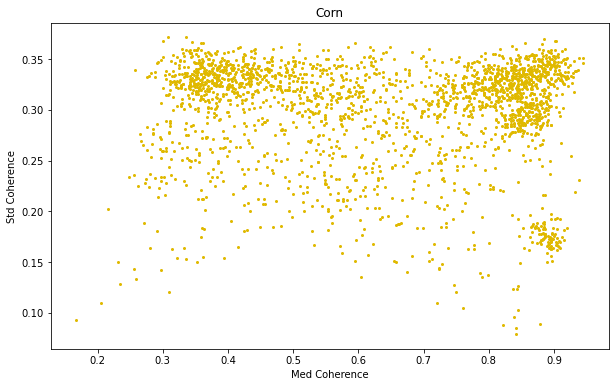

In [68]:
# corn
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==1],same_std[same_crops==1],s=4,color='#E0B900')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Corn',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

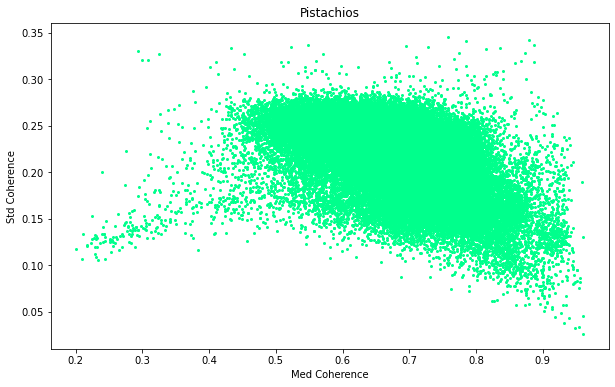

In [44]:
# pistachios
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==204],same_std[same_crops==204],s=4,color='#00FF8C')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Pistachios',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

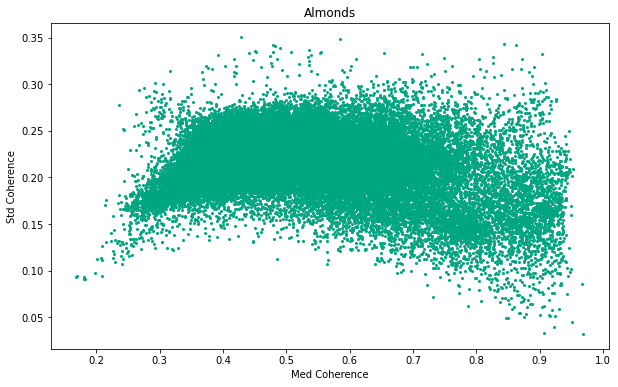

In [45]:
# almonds
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==75],same_std[same_crops==75],s=4,color='#00A682')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Almonds',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

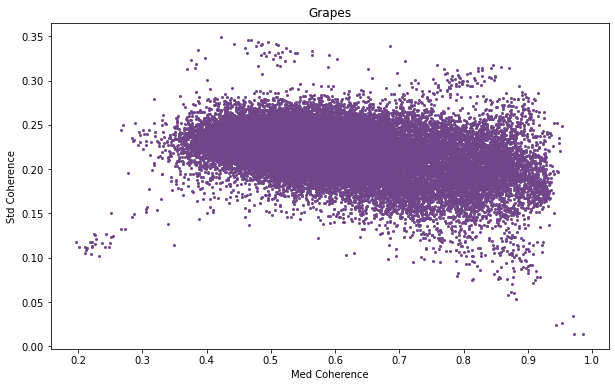

In [46]:
# grapes
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==69],same_std[same_crops==69],s=4,color='#70458A')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Grapes',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

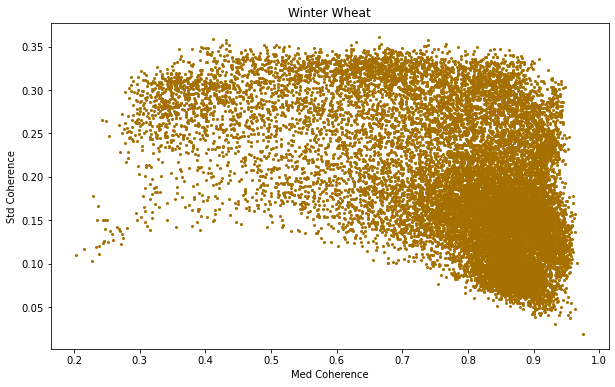

In [48]:
# winter wheat
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==24],same_std[same_crops==24],s=4,color='#A67000')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Winter Wheat',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

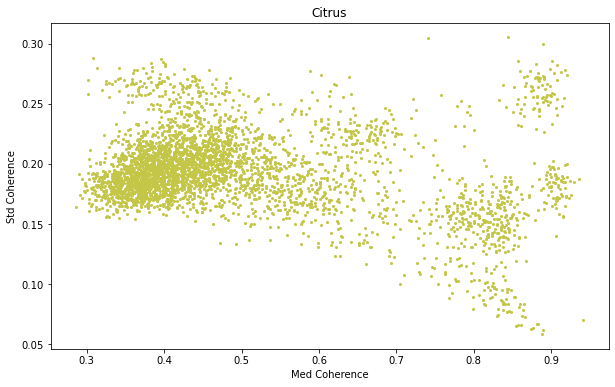

In [51]:
# citrus
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==72],same_std[same_crops==72],s=4,color='#C4C647')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Citrus',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

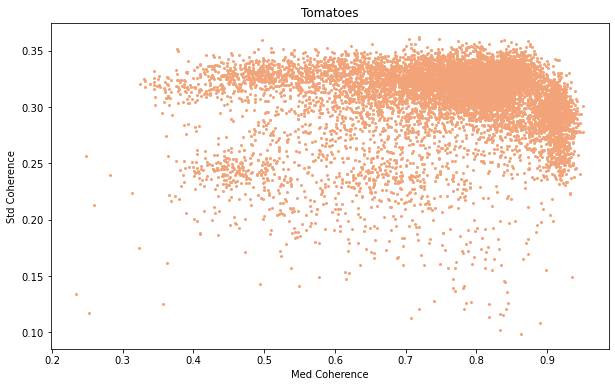

In [53]:
# tomatoes
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==54],same_std[same_crops==54],s=4,color='#F2A378')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Tomatoes',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

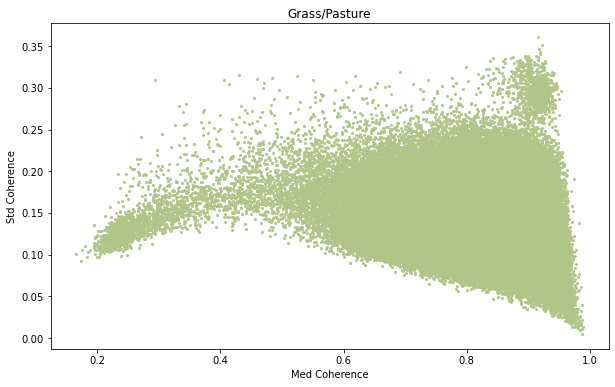

In [55]:
# grass/pasture
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==176],same_std[same_crops==176],s=4,color='#B0C689')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Grass/Pasture',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

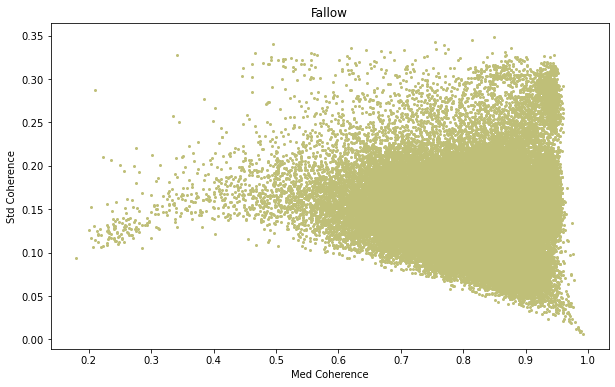

In [57]:
# fallow
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==61],same_std[same_crops==61],s=4,color='#BFBF78')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Fallow',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

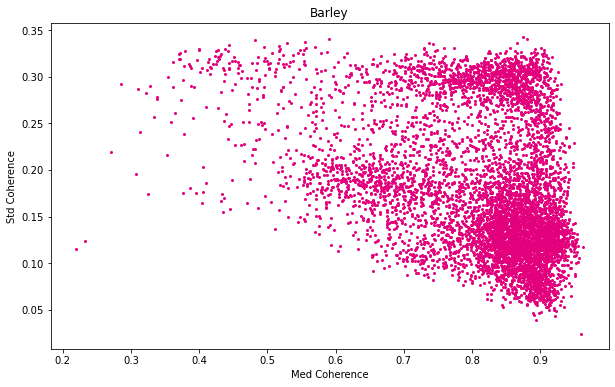

In [59]:
# barley
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==21],same_std[same_crops==21],s=4,color='#E3007D')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Barley',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

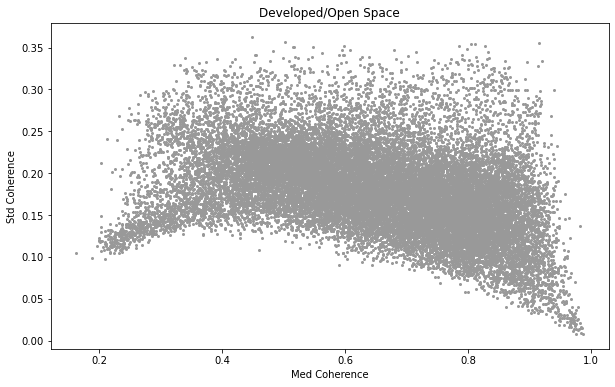

In [60]:
# Developed/Open Space
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==121],same_std[same_crops==121],s=4,color='#999999')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Developed/Open Space',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

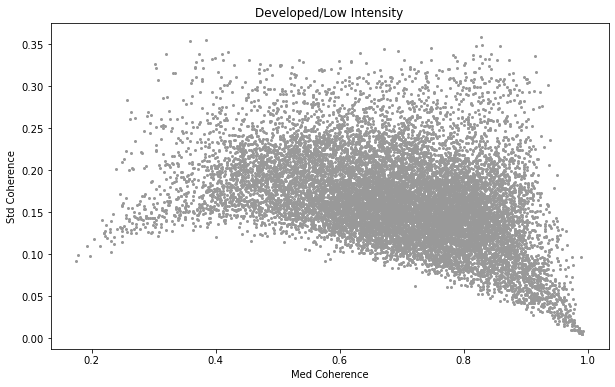

In [61]:
# Developed/Low Intensity
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==122],same_std[same_crops==122],s=4,color='#999999')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Developed/Low Intensity',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

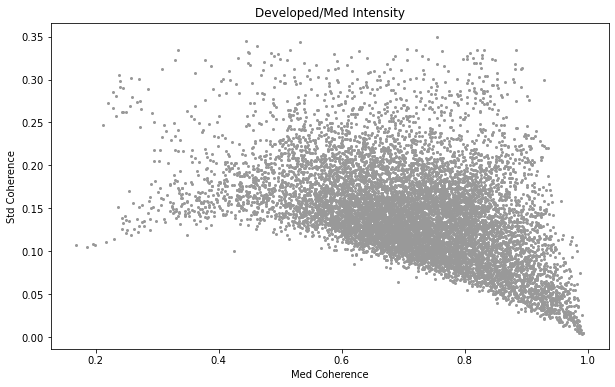

In [62]:
# Developed/Med Intensity
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==123],same_std[same_crops==123],s=4,color='#999999')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Developed/Med Intensity',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

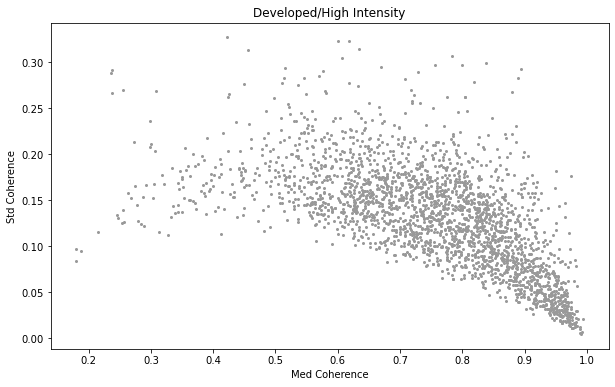

In [63]:
# Developed/High Intensity
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==124],same_std[same_crops==124],s=4,color='#999999')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Developed/High Intensity',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

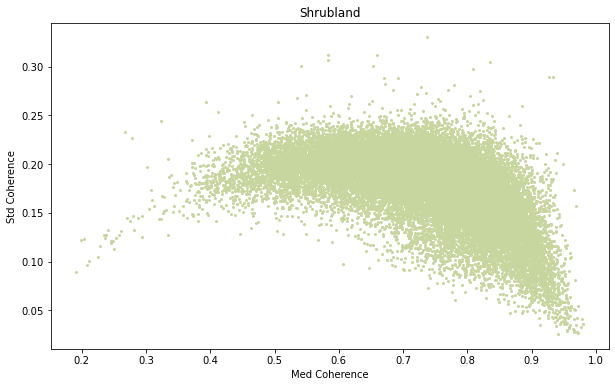

In [66]:
# Shurbland
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==152],same_std[same_crops==152],s=4,color='#C7D69E')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Shrubland',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

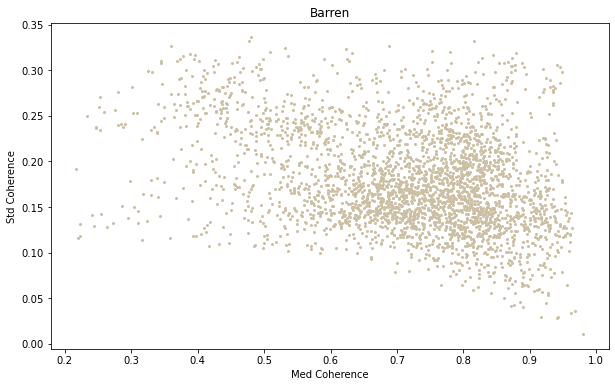

In [67]:
# Barren
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==131],same_std[same_crops==131],s=4,color='#CCBFA3')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Barren',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

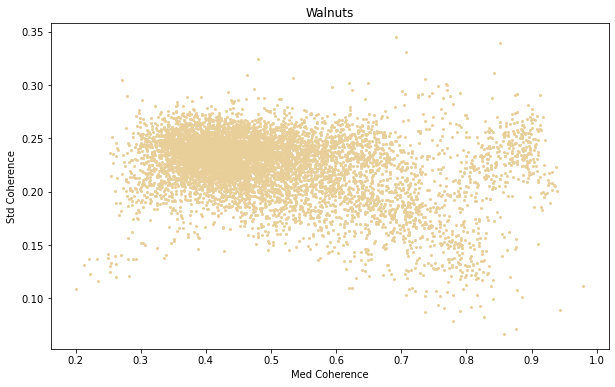

In [9]:
# walnuts
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(same_med[same_crops==76],same_std[same_crops==76],s=4,color='#E8CF99')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Walnuts',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()

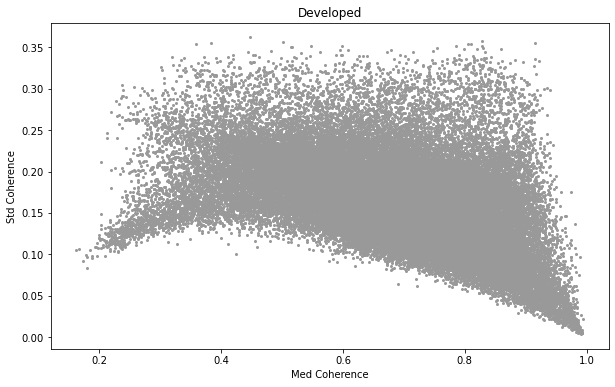

In [8]:
dev_med = np.concatenate((same_med[same_crops==121],same_med[same_crops==122],same_med[same_crops==123],same_med[same_crops==124]))
dev_std = np.concatenate((same_std[same_crops==121],same_std[same_crops==122],same_std[same_crops==123],same_std[same_crops==124]))
# All Developed
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
im = ax.scatter(dev_med,dev_std,s=4,color='#999999')
plt.xlabel('Med Coherence')
plt.ylabel('Std Coherence')
plt.title('Developed',fontsize=12)
ax.ylabel_style = {'size': 15, 'color': 'black'}
ax.xlabel_style = {'size': 15, 'color': 'black'}
plt.show()